In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import average_precision_score

# I Download data from Don’tGetKicked competition.

In [2]:
data = pd.read_csv('./training.csv')

In [3]:
data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,12/2/2009,ADESA,2001,8,MERCURY,SABLE,GS,4D SEDAN GS,...,4836.0,5937.0,NaN,NaN,18111,30212,GA,4200.0,0,993
72979,73011,0,12/2/2009,ADESA,2007,2,CHEVROLET,MALIBU 4C,LS,4D SEDAN LS,...,10151.0,11652.0,NaN,NaN,18881,30212,GA,6200.0,0,1038
72980,73012,0,12/2/2009,ADESA,2005,4,JEEP,GRAND CHEROKEE 2WD V,Lar,4D WAGON LAREDO,...,11831.0,14402.0,NaN,NaN,18111,30212,GA,8200.0,0,1893
72981,73013,0,12/2/2009,ADESA,2006,3,CHEVROLET,IMPALA,LS,4D SEDAN LS,...,10099.0,11228.0,NaN,NaN,18881,30212,GA,7000.0,0,1974


# II Design the train/validation/test split.

In [4]:
data['PurchDate'] = pd.to_datetime(data['PurchDate'])
data = data.sort_values('PurchDate')
data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
32367,32389,0,2009-01-05,MANHEIM,2007,2,CHRYSLER,PACIFICA FWD 3.8L V6,Bas,4D SPORT,...,9906.0,11657.0,NaN,NaN,3453,80022,CO,6770.0,0,1389
32384,32406,0,2009-01-05,MANHEIM,2005,4,FORD,FREESTAR FWD V6 3.9L,SES,4D PASSENGER 3.9L SES,...,5801.0,6949.0,NaN,NaN,22916,80022,CO,6160.0,0,941
32385,32407,0,2009-01-05,MANHEIM,2004,5,DODGE,STRATUS 4C 2.4L I4 M,SE,4D SEDAN SE,...,4169.0,5114.0,NaN,NaN,3453,80022,CO,4250.0,0,1155
32386,32408,0,2009-01-05,MANHEIM,2006,3,CHEVROLET,TRAILBLAZER EXT 4WD,LS,4D SUV 4.2L,...,10438.0,12158.0,NaN,NaN,22916,80022,CO,8180.0,0,1703
32387,32409,0,2009-01-05,MANHEIM,2004,5,FORD,TAURUS 3.0L V6 EFI,SES,4D SEDAN SES DURATEC,...,4139.0,5351.0,NaN,NaN,22916,80022,CO,4900.0,0,825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68063,68095,0,2010-12-30,ADESA,2006,4,SUZUKI,AERIO,SX,4D WAGON SX,...,7601.0,8041.0,NaN,NaN,52598,28273,NC,4500.0,0,983
68064,68096,1,2010-12-30,ADESA,2006,4,SUZUKI,GRAND VITARA 2WD,NaN,4D SPORT UTILITY,...,11114.0,11830.0,NaN,NaN,52598,28273,NC,7470.0,0,920
68065,68097,1,2010-12-30,ADESA,2005,5,FORD,TAURUS,SE,4D SEDAN SE,...,6476.0,9005.0,NO,GREEN,52598,28273,NC,4130.0,0,1053
60693,60722,1,2010-12-30,MANHEIM,2005,5,CHEVROLET,MALIBU 4C,Cla,4D SEDAN CLASSIC,...,6908.0,8446.0,NaN,NaN,21047,92337,CA,4395.0,0,1243


In [5]:
index_split = int(len(data) * 0.33)
train_data = data[:index_split]
valid_data = data[index_split:index_split*2]
test_data = data[index_split*2:]

In [6]:
train_data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
32367,32389,0,2009-01-05,MANHEIM,2007,2,CHRYSLER,PACIFICA FWD 3.8L V6,Bas,4D SPORT,...,9906.0,11657.0,NaN,NaN,3453,80022,CO,6770.0,0,1389
32384,32406,0,2009-01-05,MANHEIM,2005,4,FORD,FREESTAR FWD V6 3.9L,SES,4D PASSENGER 3.9L SES,...,5801.0,6949.0,NaN,NaN,22916,80022,CO,6160.0,0,941
32385,32407,0,2009-01-05,MANHEIM,2004,5,DODGE,STRATUS 4C 2.4L I4 M,SE,4D SEDAN SE,...,4169.0,5114.0,NaN,NaN,3453,80022,CO,4250.0,0,1155
32386,32408,0,2009-01-05,MANHEIM,2006,3,CHEVROLET,TRAILBLAZER EXT 4WD,LS,4D SUV 4.2L,...,10438.0,12158.0,NaN,NaN,22916,80022,CO,8180.0,0,1703
32387,32409,0,2009-01-05,MANHEIM,2004,5,FORD,TAURUS 3.0L V6 EFI,SES,4D SEDAN SES DURATEC,...,4139.0,5351.0,NaN,NaN,22916,80022,CO,4900.0,0,825
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40265,40288,0,2009-09-10,MANHEIM,2004,5,MAZDA,MAZDA6 2.3L I4 MPI,i,4D SEDAN I,...,5933.0,7303.0,NaN,NaN,19638,33619,FL,7780.0,0,905
44668,44692,0,2009-09-11,OTHER,2004,5,CHEVROLET,IMPALA 3.4L V6 SFI,Bas,4D SEDAN,...,4139.0,5415.0,NaN,NaN,17212,76063,TX,6000.0,0,1974
44672,44696,0,2009-09-11,OTHER,2005,4,MERCURY,SABLE 3.0L V6 EFI,LS,4D SEDAN LS PREMIUM,...,6309.0,8495.0,NaN,NaN,17212,76063,TX,4000.0,0,1053
44667,44691,0,2009-09-11,OTHER,2007,2,DODGE,1500 RAM PICKUP 2WD,SLT,QUAD CAB 4.7L SLT FFV,...,15856.0,16936.0,NaN,NaN,17212,76063,TX,11000.0,0,983


In [7]:
valid_data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
44666,44690,0,2009-09-11,OTHER,2007,2,CHEVROLET,IMPALA 3.5L V6 SFI,LS,4D SEDAN LS,...,10971.0,12307.0,NaN,NaN,17212,76063,TX,7800.0,0,1974
44673,44697,0,2009-09-11,OTHER,2006,3,PONTIAC,GRAND PRIX 3.8L V6 S,Bas,4D SEDAN,...,10234.0,11533.0,NaN,NaN,17212,76063,TX,7500.0,0,1703
5560,5567,0,2009-09-11,MANHEIM,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 5.7L,...,11213.0,13006.0,NaN,NaN,835,85040,AZ,9340.0,0,983
5567,5574,0,2009-09-11,MANHEIM,2007,2,CHEVROLET,UPLANDER FWD V6 3.9L,LS,PASSENGER 3.9L LS,...,7855.0,8592.0,NaN,NaN,99750,85040,AZ,7000.0,0,2282
5566,5573,1,2009-09-11,MANHEIM,2004,5,CHEVROLET,VENTURE FWD V6 3.4L,LS,PASSENGER 3.4L,...,6053.0,8445.0,NaN,NaN,99750,85040,AZ,4600.0,0,4622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59842,59871,1,2010-05-11,ADESA,2003,7,FORD,EXPLORER 2WD V6,XLS,4D SUV 4.0L FFV XLS,...,7729.0,8498.0,NaN,NaN,22808,78754,TX,7195.0,0,1455
59843,59872,0,2010-05-11,ADESA,2003,7,FORD,FOCUS,LX,4D SEDAN LX,...,5080.0,5996.0,NaN,NaN,22808,78754,TX,4405.0,0,1320
59844,59873,0,2010-05-11,ADESA,2003,7,CHRYSLER,PT CRUISER,Lim,4D SEDAN LIMITED,...,6712.0,7787.0,NaN,NaN,22808,78754,TX,6020.0,0,1275
26774,26792,0,2010-05-11,MANHEIM,2007,3,FORD,FUSION 4C,S,4D SEDAN S,...,12312.0,13660.0,NaN,NaN,20833,75050,TX,7240.0,0,853


In [8]:
test_data

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
37479,37502,0,2010-05-11,MANHEIM,2004,6,PONTIAC,VIBE,Bas,4D WAGON,...,8031.0,9749.0,NaN,NaN,8172,30331,GA,5730.0,0,569
37478,37501,0,2010-05-11,MANHEIM,2006,4,FORD,TAURUS,SE,4D SEDAN SE,...,7567.0,8579.0,NaN,NaN,8172,30331,GA,5730.0,0,983
63568,63599,0,2010-05-11,MANHEIM,2004,6,CHEVROLET,TRAILBLAZER 2WD 6C,Nor,4D SUV 4.2L LS,...,9449.0,10602.0,NaN,NaN,18111,37210,TN,7125.0,0,1341
63569,63600,0,2010-05-11,MANHEIM,2007,3,CHEVROLET,COBALT,LS,2D COUPE,...,8686.0,9772.0,NaN,NaN,18111,37210,TN,6600.0,0,623
63570,63601,0,2010-05-11,MANHEIM,2006,4,FORD,FREESTYLE FWD V6,SE,4D CUV 3.0L SE,...,11936.0,13866.0,NaN,NaN,18111,37210,TN,8200.0,0,1506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68063,68095,0,2010-12-30,ADESA,2006,4,SUZUKI,AERIO,SX,4D WAGON SX,...,7601.0,8041.0,NaN,NaN,52598,28273,NC,4500.0,0,983
68064,68096,1,2010-12-30,ADESA,2006,4,SUZUKI,GRAND VITARA 2WD,NaN,4D SPORT UTILITY,...,11114.0,11830.0,NaN,NaN,52598,28273,NC,7470.0,0,920
68065,68097,1,2010-12-30,ADESA,2005,5,FORD,TAURUS,SE,4D SEDAN SE,...,6476.0,9005.0,NO,GREEN,52598,28273,NC,4130.0,0,1053
60693,60722,1,2010-12-30,MANHEIM,2005,5,CHEVROLET,MALIBU 4C,Cla,4D SEDAN CLASSIC,...,6908.0,8446.0,NaN,NaN,21047,92337,CA,4395.0,0,1243


# III Feature preprocessing

In [9]:
print(train_data.info())
print(valid_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24084 entries, 32367 to 44671
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              24084 non-null  int64         
 1   IsBadBuy                           24084 non-null  int64         
 2   PurchDate                          24084 non-null  datetime64[ns]
 3   Auction                            24084 non-null  object        
 4   VehYear                            24084 non-null  int64         
 5   VehicleAge                         24084 non-null  int64         
 6   Make                               24084 non-null  object        
 7   Model                              24084 non-null  object        
 8   Trim                               23370 non-null  object        
 9   SubModel                           24076 non-null  object        
 10  Color                              

### Заполняем пропущенные значения модой

так как в столбцах'PRIMEUNIT', "PRIMEUNIT" преобладают пропуски то заменим их на отдельное значение

In [10]:
train_data.loc[:, 'AUCGUART'] = train_data['AUCGUART'].fillna('NO')
train_data.loc[:, 'PRIMEUNIT'] = train_data['PRIMEUNIT'].fillna('NO')


valid_data.loc[:, 'AUCGUART'] = valid_data['AUCGUART'].fillna('NO')
valid_data.loc[:, 'PRIMEUNIT'] = valid_data['PRIMEUNIT'].fillna('NO')

test_data.loc[:, 'AUCGUART'] = test_data['AUCGUART'].fillna('NO')
test_data.loc[:, 'PRIMEUNIT'] = test_data['PRIMEUNIT'].fillna('NO')

In [11]:
def fill_nan(df):
    df = df.copy()
    for col in df.columns:
        mode = df[col].mode()
        df[col] = df[col].fillna(mode.iloc[0])
    return df



train_data = fill_nan(train_data)
valid_data = fill_nan(valid_data)
test_data = fill_nan(test_data)

In [12]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 24084 entries, 32367 to 44671
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   RefId                              24084 non-null  int64         
 1   IsBadBuy                           24084 non-null  int64         
 2   PurchDate                          24084 non-null  datetime64[ns]
 3   Auction                            24084 non-null  object        
 4   VehYear                            24084 non-null  int64         
 5   VehicleAge                         24084 non-null  int64         
 6   Make                               24084 non-null  object        
 7   Model                              24084 non-null  object        
 8   Trim                               24084 non-null  object        
 9   SubModel                           24084 non-null  object        
 10  Color                              

### Получаем список категориальных признаков для их обработки

In [13]:
categorical_features = [
    "Auction",
    "Make",
    "Model",
    "Trim",
    "SubModel",
    "Color",
    "Transmission",
    "WheelTypeID",
    "WheelType",
    "Nationality",
    "Size",
    "TopThreeAmericanName",
    "PRIMEUNIT",
    "AUCGUART",
    "PurchDate",
    "VNZIP1",
    "VNST",
    "IsOnlineSale"     
]

numeric_features = [
    "BYRNO",
    "VehYear",
    "VehicleAge",
    "VehOdo",
    "MMRAcquisitionAuctionAveragePrice",
    "MMRAcquisitionAuctionCleanPrice",
    "MMRAcquisitionRetailAveragePrice",
    "MMRAcquisitonRetailCleanPrice",
    "MMRCurrentAuctionAveragePrice",
    "MMRCurrentAuctionCleanPrice",
    "MMRCurrentRetailAveragePrice",
    "MMRCurrentRetailCleanPrice",
    "VehBCost",
    "WarrantyCost",  
    "RefId"
]


### кодируем их с помощью OneHot

In [14]:
one_hot = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
one_hot.fit(train_data[categorical_features])

train_ohe = pd.DataFrame(one_hot.transform(train_data[categorical_features]),
                         index = train_data.index,
                         columns=one_hot.get_feature_names_out(categorical_features))

valid_ohe = pd.DataFrame(one_hot.transform(valid_data[categorical_features]),
                         index = valid_data.index,
                         columns=one_hot.get_feature_names_out(categorical_features))

test_ohe = pd.DataFrame(one_hot.transform(test_data[categorical_features]),
                         index = test_data.index,
                         columns=one_hot.get_feature_names_out(categorical_features))

train_data = pd.concat([train_data.drop(columns=categorical_features), train_ohe], axis=1)
valid_data  = pd.concat([valid_data.drop(columns=categorical_features),  valid_ohe],  axis=1)
test_data  = pd.concat([test_data.drop(columns=categorical_features),  test_ohe],  axis=1)

In [15]:
train_data.head()

,RefId,IsBadBuy,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,...,VNST_OH,VNST_OK,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA,VNST_WA,IsOnlineSale_0
32367,32389,0,2007,2,78541,7261.0,8857.0,8342.0,10066.0,8709.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32384,32406,0,2005,4,37676,4409.0,5734.0,5262.0,6693.0,4908.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32385,32407,0,2004,5,71680,3098.0,4061.0,3846.0,4886.0,3397.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32386,32408,0,2006,3,69456,8530.0,9883.0,9712.0,11174.0,9202.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32387,32409,0,2004,5,66530,3094.0,4230.0,3842.0,5068.0,3369.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Нормализуем численные признаки

In [16]:
scaler = StandardScaler()       
scaler.fit(train_data[numeric_features])

train_num = pd.DataFrame(scaler.transform(train_data[numeric_features]), 
                         index=train_data.index, 
                         columns=numeric_features)

valid_num = pd.DataFrame(scaler.transform(valid_data[numeric_features]), 
                         index=valid_data.index, 
                         columns=numeric_features)

test_num  = pd.DataFrame(scaler.transform(test_data[numeric_features]),  
                         index=test_data.index,  
                         columns=numeric_features)

train_data = pd.concat([train_data.drop(columns=numeric_features), train_num], axis=1)
valid_data = pd.concat([valid_data.drop(columns=numeric_features),  valid_num],  axis=1)
test_data  = pd.concat([test_data.drop(columns=numeric_features),   test_num],   axis=1)

In [17]:
train_data.head()

,IsBadBuy,Auction_ADESA,Auction_MANHEIM,Auction_OTHER,Make_ACURA,Make_BUICK,Make_CADILLAC,Make_CHEVROLET,Make_CHRYSLER,Make_DODGE,...,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost,WarrantyCost,RefId
32367,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.659105,0.587621,0.657519,1.143971,1.169756,1.058992,1.078883,0.232833,0.113453,-0.245765
32384,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.462994,-0.548573,-0.457665,-0.340289,-0.399479,-0.364632,-0.384537,-0.108641,-0.621453,-0.244953
32385,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-1.064106,-1.070927,-1.055097,-0.930322,-1.010976,-0.930613,-0.954923,-1.177849,-0.270404,-0.244906
32386,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.027748,1.093005,1.023847,1.336484,1.336397,1.243490,1.234612,1.022144,0.628544,-0.244858
32387,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.003384,-1.072402,-0.994924,-0.941256,-0.931795,-0.941017,-0.881255,-0.813982,-0.811742,-0.244810


# IV Train LogisticRegression, GaussianNB, KNN

In [18]:
target = 'IsBadBuy'

X_train = train_data.drop(columns=[target])
y_train = train_data[target]

X_valid = valid_data.drop(columns=[target])
y_valid = valid_data[target]

X_test = test_data.drop(columns=[target])
y_test = test_data[target]

## LogisticRegression

In [252]:
log_reg = LogisticRegression(class_weight='balanced', max_iter = 5000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_valid)
y_score = log_reg.predict_proba(X_valid)

prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
auc = roc_auc_score(y_valid, y_score[:, 1])
gini = 2 * auc - 1

In [253]:
print(f'Precision -- {prec:.2}')
print(f'Recall -- {rec:.2}')
print(f'F1 -- {f1:.2}')
print(f'AUC -- {auc:.2}')
print(f'Gini -- {gini:.2}')

Precision -- 0.28
Recall -- 0.17
F1 -- 0.21
AUC -- 0.63
Gini -- 0.26


## GaussianNB

In [176]:
gauss = GaussianNB()
gauss.fit(X_train, y_train)

y_pred = gauss.predict(X_valid)
y_score = gauss.predict_proba(X_valid)

prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
auc = roc_auc_score(y_valid, y_score[:, 1])
gini = 2 * auc - 1

In [177]:
print(f'Precision -- {prec:.2}')
print(f'Recall -- {rec:.2}')
print(f'F1 -- {f1:.2}')
print(f'AUC -- {auc:.2}')
print(f'Gini -- {gini:.2}')

Precision -- 0.14
Recall -- 0.59
F1 -- 0.23
AUC -- 0.53
Gini -- 0.058


# KNN

In [178]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_valid)
y_score = knn.predict_proba(X_valid)

prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
auc = roc_auc_score(y_valid, y_score[:, 1])
gini = 2 * auc - 1

In [179]:
print(f'Precision -- {prec:.2}')
print(f'Recall -- {rec:.2}')
print(f'F1 -- {f1:.2}')
print(f'AUC -- {auc:.2}')
print(f'Gini -- {gini:.2}')

Precision -- 0.31
Recall -- 0.046
F1 -- 0.08
AUC -- 0.59
Gini -- 0.19


лучший коэффициент gini = 0.3 у модели LogisticRegression

# V ROC AUC

In [180]:
def roc_auc_from_scores(y_true, y_score):

    y_true = np.asarray(y_true)
    y_score = np.asarray(y_score)
    desc_idx = np.argsort(-y_score, kind='mergesort')
    y_true_sorted = y_true[desc_idx]
    y_score_sorted = y_score[desc_idx]

    P = np.sum(y_true == 1)
    N = np.sum(y_true == 0)
    if P == 0 or N == 0:
        return np.nan  # AUC не определён при отсутствии одного из классов

    # получаем уникальные пороги и координаты ROC: TPR (y) и FPR (x)
    # Но эффективнее: посчитать ранговую сумму положительных
    # AUC = (sum_ranks_pos - P*(P+1)/2) / (P*N), где ranks — ранги в порядке возрастания
    # Нужны ранги по возрастанию; используем argsort twice для стабильных рангов
    asc_idx = np.argsort(y_score, kind='mergesort')
    ranks = np.empty_like(asc_idx)
    ranks[asc_idx] = np.arange(1, len(y_score) + 1)  # ранги 1..n (по возрастанию)
    sum_ranks_pos = np.sum(ranks[y_true == 1])
    auc = (sum_ranks_pos - P * (P + 1) / 2.0) / (P * N)
    return auc

дадим данные предсказания LogisticRegression

In [184]:
roc_auc = roc_auc_from_scores(y_valid, y_score[:, 1])
print(f'AUC -- {auc:.2}')
print(f'My AUC -- {roc_auc:.2}')

AUC -- 0.65
My AUC -- 0.65


получили тот же результат

In [185]:
print(f'Gini: {abs(2 * roc_auc - 1):.2}')

Gini: 0.3


# VI Implement your own versions of LogisticRegression, KNN and NaiveBayes classifiers.

## LogisticRegression

In [187]:
import numpy as np

class MyLogisticRegression:
    
    def __init__(self, max_iter=100):
        self.coef_ = None
        self.intercept_ = None
        self.max_iter = max_iter
        
    def fit(self, X, y, lr=0.1):
        X = np.array(X)
        y = np.array(y)
        
        assert len(y.shape) == 1 and len(X.shape) == 2
        assert X.shape[0] == y.shape[0]
        
        y = y[:, np.newaxis]
        l, n = X.shape

        X = np.hstack([np.ones([X.shape[0], 1]), X]) # [l, n+1]
        
        weights = np.random.randn(n + 1, 1)
        
        for _ in range(self.max_iter):
            idx = np.random.permutation(l)
            for i in idx:
                xi = X[i:i+1]              # shape (1, n+1)
                yi = y[i:i+1]              # shape (1, 1)
                logits = xi @ weights
                y_pred = self.sigmoid(logits)
                grad = self.grad(xi, yi, y_pred)  # shape (n+1, 1)
                weights -= lr * grad  
            
        self.coef_ = weights[1:]
        self.intercept_ = weights[0]
        
        return self
        
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X)[:, 1] >= threshold).astype(int)
    
    def predict_proba(self, X):
        X = np.array(X)
        X = np.hstack([np.ones([X.shape[0], 1]), X])
        weights = np.concatenate([self.intercept_.reshape(-1,1), self.coef_], axis=0)
        logits = (X @ weights)
        probs = self.sigmoid(logits)
        return np.hstack([1 - probs, probs]) 
        
    def grad(self, X, y_true, y_pred):
        grad = X.T @ (y_pred - y_true) 
        return grad
    
    def sigmoid(self, t):
        return 1. / (1 + np.exp(-t))


In [193]:
my_log_reg = MyLogisticRegression(max_iter=1000)
my_log_reg.fit(X_train, y_train)

y_pred = my_log_reg.predict(X_valid)
y_score = my_log_reg.predict_proba(X_valid)

prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
auc = roc_auc_score(y_valid, y_score[:, 1])
gini = 2 * auc - 1

In [194]:
print(f'Precision -- {prec:.2}')
print(f'Recall -- {rec:.2}')
print(f'F1 -- {f1:.2}')
print(f'AUC -- {auc:.2}')
print(f'Gini -- {gini:.2}')

Precision -- 0.18
Recall -- 0.19
F1 -- 0.18
AUC -- 0.56
Gini -- 0.12


## KNN

In [23]:
class KNN:
    def __init__(self, k=3):
        self.k = int(k)
        self.X_train = None
        self.y_train = None
        self.classes_ = None

    def fit(self, X, y):
        self.X_train = np.asarray(X, dtype=float)
        self.y_train = np.asarray(y)
        self.classes_, _ = np.unique(self.y_train, return_inverse=True)
        return self

    def _pairwise_distances(self, A, B):
        A_sq = (A**2).sum(axis=1)[:, None]   # (m,1)
        B_sq = (B**2).sum(axis=1)[None, :]   # (1,n)
        cross = A @ B.T                      # (m,n)
        d2 = A_sq + B_sq - 2.0 * cross
        np.maximum(d2, 0, out=d2)
        return np.sqrt(d2)

    def predict(self, X):
        X = np.asarray(X, dtype=float)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        m = X.shape[0]

        dists = self._pairwise_distances(X, self.X_train)
        # для каждого примера берем индексы k ближайших (неполная сортировка быстрее)
        idx = np.argpartition(dists, self.k - 1, axis=1)[:, :self.k]  # (m,k)
        preds = []
        for i in range(m):
            neigh_labels = self.y_train[idx[i]]
            most_common = Counter(neigh_labels).most_common(1)[0][0]
            preds.append(most_common)
        return np.array(preds)

    def predict_proba(self, X):
        X = np.asarray(X, dtype=float)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        if self.X_train is None:
            raise ValueError("Model is not fitted yet.")
        dists = self._pairwise_distances(X, self.X_train)
        idx = np.argpartition(dists, self.k - 1, axis=1)[:, :self.k]  # (m,k)
        probs = np.zeros((X.shape[0], self.classes_.size), dtype=float)
        for i in range(X.shape[0]):
            neigh_labels = self.y_train[idx[i]]
            counts = Counter(neigh_labels)
            for j, cls in enumerate(self.classes_):
                probs[i, j] = counts.get(cls, 0) / self.k
        return probs


In [30]:
my_knn = KNN()
my_knn.fit(X_train[:15000], y_train[:15000])

y_pred = my_knn.predict(X_valid)
y_score = my_knn.predict_proba(X_valid)

prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
auc = roc_auc_score(y_valid, y_score[:, 1])
gini = 2 * auc - 1

In [31]:
print(f'Precision -- {prec:.2}')
print(f'Recall -- {rec:.2}')
print(f'F1 -- {f1:.2}')
print(f'AUC -- {auc:.2}')
print(f'Gini -- {gini:.2}')

Precision -- 0.26
Recall -- 0.067
F1 -- 0.11
AUC -- 0.56
Gini -- 0.12


## GaussianNB

In [20]:
class GaussianNaiveBayes:
    """
    Gaussian Naive Bayes for continuous features.
    Assumes features independent and normally distributed per class.
    """
    def __init__(self, var_smoothing=1e-9):
        self.epsilon = var_smoothing

    def fit(self, X, y):
        X = np.asarray(X, dtype=float)
        y = np.asarray(y)
        self.classes_ = np.unique(y)
        n_classes = self.classes_.size
        n_features = X.shape[1]
        self.class_count_ = np.zeros(n_classes, dtype=float)
        self.class_prior_ = np.zeros(n_classes, dtype=float)
        self.theta_ = np.zeros((n_classes, n_features))  
        self.sigma_ = np.zeros((n_classes, n_features))  

        for idx, c in enumerate(self.classes_):
            Xc = X[y == c]
            self.class_count_[idx] = Xc.shape[0]
            self.class_prior_[idx] = Xc.shape[0] / X.shape[0]
            self.theta_[idx, :] = Xc.mean(axis=0)
            self.sigma_[idx, :] = Xc.var(axis=0) + self.epsilon
        return self

    def _joint_log_likelihood(self, X):
        # log P(class) + sum log P(x_i | class)
        X = np.asarray(X, dtype=float)
        n_samples, n_features = X.shape
        jll = np.zeros((n_samples, self.classes_.size))
        for idx in range(self.classes_.size):
            mean = self.theta_[idx]
            var = self.sigma_[idx]
            log_prob = -0.5 * (np.log(2.0 * np.pi * var) + ((X - mean) ** 2) / var)
            jll[:, idx] = np.log(self.class_prior_[idx]) + np.sum(log_prob, axis=1)
        return jll

    def predict_proba(self, X):
        jll = self._joint_log_likelihood(X)
        log_prob_x = np.logaddexp.reduce(jll, axis=1)  # log sum exp
        probs = np.exp(jll - log_prob_x[:, None])
        return probs

    def predict(self, X):
        jll = self._joint_log_likelihood(X)
        idx = np.argmax(jll, axis=1)
        return self.classes_[idx]

In [21]:
my_gnb = GaussianNaiveBayes()
my_gnb.fit(X_train, y_train)

y_pred = my_gnb.predict(X_valid)
y_score = my_gnb.predict_proba(X_valid)

prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
auc = roc_auc_score(y_valid, y_score[:, 1])
gini = 2 * auc - 1

In [22]:
print(f'Precision -- {prec:.2}')
print(f'Recall -- {rec:.2}')
print(f'F1 -- {f1:.2}')
print(f'AUC -- {auc:.2}')
print(f'Gini -- {gini:.2}')

Precision -- 0.14
Recall -- 0.59
F1 -- 0.23
AUC -- 0.53
Gini -- 0.058


# VII non-linear features

In [280]:
#  средний пробег в год
X_train["VehOdo_per_year"] = X_train["VehOdo"] / (X_train["VehicleAge"] + 0.01)

# как изменилась ожидаемая розничная цена
X_train["PriceRatio_current_acq"] = X_train["MMRCurrentRetailAveragePrice"] / (
    X_train["MMRAcquisitionRetailAveragePrice"] + 0.01
)

# предполагаемая маржа 

X_train["ProfitPotential"] = ( X_train["MMRCurrentRetailAveragePrice"]
    - X_train["VehBCost"]
    - X_train["WarrantyCost"]
)


X_valid["VehOdo_per_year"] = X_valid["VehOdo"] / (X_valid["VehicleAge"] + 0.01)

X_valid["PriceRatio_current_acq"] = X_valid["MMRCurrentRetailAveragePrice"] / (
    X_valid["MMRAcquisitionRetailAveragePrice"] + 0.01
)

X_valid["ProfitPotential"] = ( X_valid["MMRCurrentRetailAveragePrice"]
    - X_valid["VehBCost"]
    - X_valid["WarrantyCost"]
)

In [289]:
log_reg = LogisticRegression(class_weight='balanced', max_iter = 1000, penalty='elasticnet', solver='saga', C=0.1, l1_ratio=1.0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_valid)
y_score = log_reg.predict_proba(X_valid)

prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
auc = roc_auc_score(y_valid, y_score[:, 1])
gini = 2 * auc - 1

/home/elisei/programs_21/DS_ML/ML.Project_4.ID_1254802-1/src/envi/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [290]:
print(f'Precision -- {prec:.2}')
print(f'Recall -- {rec:.2}')
print(f'F1 -- {f1:.2}')
print(f'AUC -- {auc:.2}')
print(f'Gini -- {gini:.2}')

Precision -- 0.19
Recall -- 0.48
F1 -- 0.27
AUC -- 0.63
Gini -- 0.26


# VII Determine the best features for the problem 

## Using L1 - regularization

In [195]:
log_reg = LogisticRegression(max_iter = 5000, penalty='l1', solver='liblinear')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_valid)
y_score = log_reg.predict_proba(X_valid)

prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
auc = roc_auc_score(y_valid, y_score[:, 1])
gini = 2 * auc - 1

In [196]:
coefficients = log_reg.coef_.ravel()
coefficients
feature_importance = pd.Series(coefficients, index=X_train.columns)
feature_importance.sort_values()
nonzero_feats = feature_importance[feature_importance != 0]
nonzero_names = nonzero_feats.index.tolist()
feature_importance

Auction_ADESA                   0.262458
Auction_MANHEIM                -0.098520
Auction_OTHER                   0.000000
Make_ACURA                      0.539770
Make_BUICK                     -0.235607
                                  ...   
MMRCurrentRetailAveragePrice   -0.370206
MMRCurrentRetailCleanPrice     -0.138602
VehBCost                       -0.321346
WarrantyCost                    0.043265
RefId                           0.102929
Length: 2001, dtype: float64

In [197]:
print(f'Precision -- {prec:.2}')
print(f'Recall -- {rec:.2}')
print(f'F1 -- {f1:.2}')
print(f'AUC -- {auc:.2}')
print(f'Gini -- {gini:.2}')

Precision -- 0.54
Recall -- 0.0041
F1 -- 0.0082
AUC -- 0.67
Gini -- 0.35


## Using hand eliminate useless features 

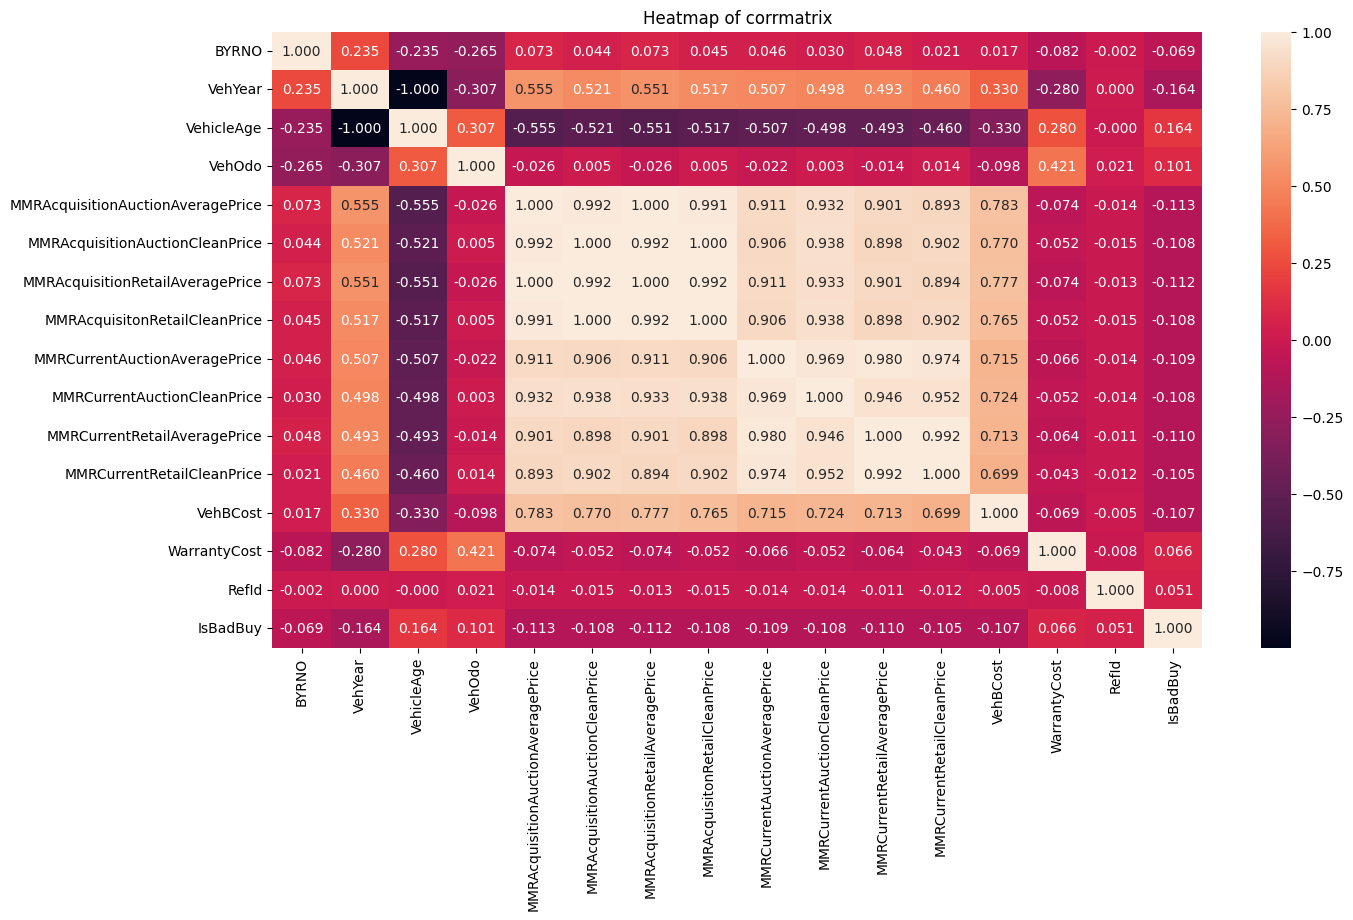

In [198]:
corrmatrix = train_data[numeric_features + ['IsBadBuy']].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corrmatrix, annot=True, fmt='.3f')
plt.title('Heatmap of corrmatrix')
plt.show()

удалим сильно кореллирующие между собой признаки оставив один из низ

In [199]:
delete_feature = [
    "MMRAcquisitionAuctionAveragePrice",
    "MMRAcquisitionAuctionCleanPrice",
    "MMRAcquisitionRetailAveragePrice",
    "MMRAcquisitonRetailCleanPrice",
    "MMRCurrentAuctionAveragePrice",
    "MMRCurrentAuctionCleanPrice",
    "MMRCurrentRetailAveragePrice",
                 ]

train_data = train_data.drop(columns=delete_feature)
valid_data = valid_data.drop(columns=delete_feature)

In [200]:
X_train = train_data.drop(columns=[target])
y_train = train_data[target]

X_valid = valid_data.drop(columns=[target])
y_valid = valid_data[target]

In [201]:
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_valid)
y_score = log_reg.predict_proba(X_valid)

prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
auc = roc_auc_score(y_valid, y_score[:, 1])
gini = 2 * auc - 1

In [202]:
print(f'Precision -- {prec:.2}')
print(f'Recall -- {rec:.2}')
print(f'F1 -- {f1:.2}')
print(f'AUC -- {auc:.2}')
print(f'Gini -- {gini:.2}')

Precision -- 0.55
Recall -- 0.0089
F1 -- 0.017
AUC -- 0.66
Gini -- 0.32


# X Optimal model

In [254]:
X_train = train_data.drop(columns=[target])
X_train = X_train[nonzero_names]
y_train = train_data[target]

X_valid = valid_data.drop(columns=[target])
X_valid = X_valid[nonzero_names]
y_valid = valid_data[target]

X_test = test_data.drop(columns=[target])
X_test = X_test[nonzero_names]
y_test = test_data[target]

In [255]:
log_reg = LogisticRegression(class_weight='balanced', max_iter = 1000, penalty='elasticnet', solver='saga', C=0.1, l1_ratio=1.0)
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_valid)
y_score = log_reg.predict_proba(X_valid)

prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
auc = roc_auc_score(y_valid, y_score[:, 1])
gini = 2 * auc - 1

In [256]:
print(f'Precision -- {prec:.2}')
print(f'Recall -- {rec:.2}')
print(f'F1 -- {f1:.2}')
print(f'AUC -- {auc:.2}')
print(f'Gini -- {gini:.2}')

Precision -- 0.24
Recall -- 0.4
F1 -- 0.3
AUC -- 0.67
Gini -- 0.35


# XI Check the Gini scores on all three datasets for your best model: training Gini, valid Gini, test Gini

In [257]:
y_pred_train = log_reg.predict(X_train)
y_score_train = log_reg.predict_proba(X_train)

y_pred_test = log_reg.predict(X_test)
y_score_test = log_reg.predict_proba(X_test)

In [258]:
train_prec = precision_score(y_train, y_pred_train, average='binary', zero_division=0, pos_label=1)
train_rec = recall_score(y_train, y_pred_train, average='binary', zero_division=0,  pos_label=1)
train_f1 = f1_score(y_train, y_pred_train, average='binary', zero_division=0,  pos_label=1)
train_auc = roc_auc_score(y_train, y_score_train[:, 1])
train_gini = 2 * train_auc - 1

valid_prec = precision_score(y_valid, y_pred, average='binary', zero_division=0, pos_label=1)
valid_rec = recall_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
valid_f1 = f1_score(y_valid, y_pred, average='binary', zero_division=0,  pos_label=1)
valid_auc = roc_auc_score(y_valid, y_score[:, 1])
valid_gini = 2 * valid_auc - 1

test_prec = precision_score(y_test, y_pred_test, average='binary', zero_division=0)
test_rec = recall_score(y_test, y_pred_test, average='binary', zero_division=0)
test_f1 = f1_score(y_test, y_pred_test, average='binary', zero_division=0)
test_auc = roc_auc_score(y_test, y_score_test[:, 1])
test_gini = 2 * test_auc - 1

In [259]:
print(f'Train Precision -- {train_prec:.2}')
print(f'Train Recall -- {train_rec:.2}')
print(f'Train F1 -- {train_f1:.2}')
print(f'Train AUC -- {train_auc:.2}')
print(f'Train Gini -- {train_gini:.2}')
print('-----------------------------')
print(f'Valid Precision -- {valid_prec:.2}')
print(f'Valid Recall -- {valid_rec:.2}')
print(f'Valid F1 -- {valid_f1:.2}')
print(f'Valid AUC -- {valid_auc:.2}')
print(f'Valid Gini -- {valid_gini:.2}')
print('-----------------------------')
print(f'Test Precision -- {test_prec:.2}')
print(f'Test Recall -- {test_rec:.2}')
print(f'Test F1 -- {test_f1:.2}')
print(f'Test AUC -- {test_auc:.2}')
print(f'Test Gini -- {test_gini:.2}')

Train Precision -- 0.2
Train Recall -- 0.67
Train F1 -- 0.31
Train AUC -- 0.73
Train Gini -- 0.46
-----------------------------
Valid Precision -- 0.24
Valid Recall -- 0.4
Valid F1 -- 0.3
Valid AUC -- 0.67
Valid Gini -- 0.35
-----------------------------
Test Precision -- 0.2
Test Recall -- 0.83
Test F1 -- 0.25
Test AUC -- 0.63
Test Gini -- 0.26


# XII Implement calculation of Recall, Precision, F1 score and AUC PR metrics. Compare your algorithms on the test dataset using AUC PR metric.

In [260]:
train_auc_pr_ap = average_precision_score(y_train, y_score_train[:, 1])
valid_auc_pr_ap = average_precision_score(y_valid, y_score[:, 1])
test_auc_pr_ap = average_precision_score(y_test, y_score_test[:, 1])

In [261]:
print(f'Train Precision -- {train_prec:.2}')
print(f'Train Recall -- {train_rec:.2}')
print(f'Train F1 -- {train_f1:.2}')
print(f'Train AUC ROC -- {train_auc:.2}')
print(f'Train Gini -- {train_gini:.2}')
print(f'Train AUC PR -- {train_auc_pr_ap:.2}')
print('-----------------------------')
print(f'Valid Precision -- {valid_prec:.2}')
print(f'Valid Recall -- {valid_rec:.2}')
print(f'Valid F1 -- {valid_f1:.2}')
print(f'Valid AUC ROC -- {valid_auc:.2}')
print(f'Valid Gini -- {valid_gini:.2}')
print(f'Valid AUC PR -- {valid_auc_pr_ap:.2}')
print('-----------------------------')
print(f'Test Precision -- {test_prec:.2}')
print(f'Test Recall -- {test_rec:.2}')
print(f'Test F1 -- {test_f1:.2}')
print(f'Test AUC ROC -- {test_auc:.2}')
print(f'Test Gini -- {test_gini:.2}')
print(f'Test AUC PR -- {test_auc_pr_ap:.2}')

Train Precision -- 0.2
Train Recall -- 0.67
Train F1 -- 0.31
Train AUC ROC -- 0.73
Train Gini -- 0.46
Train AUC PR -- 0.26
-----------------------------
Valid Precision -- 0.24
Valid Recall -- 0.4
Valid F1 -- 0.3
Valid AUC ROC -- 0.67
Valid Gini -- 0.35
Valid AUC PR -- 0.24
-----------------------------
Test Precision -- 0.2
Test Recall -- 0.83
Test F1 -- 0.25
Test AUC ROC -- 0.63
Test Gini -- 0.26
Test AUC PR -- 0.19


# XIII Which hard label metric do you prefer for the task of detecting "lemon" cars?

Prescision так как мне нужно знать точно плохая это покупка машины или нет или AUC PR так как целевая переменная не сбалансирована